# Problem set #2
Due Feb 20th, 2023, by midnight

20 points total

Please share your answers with Rabia Gondur at rgondur@fordham.edu. Please adjust the name of the notebook file to include your last name. Remember **adding comments to your code** can be helpful to graders, especially if you want explain the logic of something, or want to clarify a line that may not be easy to interpret by eye.

All code must be executable from scratch. Code should be written properly (i.e. put code in functions as needed, declare variables as needed, and don't repeat yourself.) Only use functions from the packages loaded in the first block of code below for this problem set. 

Make sure all plots contain appropriately labelled axes and are easy to read and interpret.


## Understanding the problem

For this problem set we will be working with on with a popular data set used in biological modeling called the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

This dataset is typically used for **classification** , when we use different measurements from distinct flower species and try to correctly categorize them from their measurements. A variety of machine learning methods may be used on this dataset, but for this problem set we will focus on **multivariate linear regression**. Though linear regression is not explicitly designed for predicting species (classification) the linear regression framework is flexible enough to do it.

Let us first import some package so we can easily work with the data. Fortunately, the data can be downloaded directly into our notebooks from the scikitlearn python package.

In [ ]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# We will fix a random seed for reproducibility:
seed = 11
np.random.seed(seed)

## Understanding the data

The next cell will load in the data. Here, I have written a vector that will tell you each of the measurements made from each flower species. Those measurements are, in the following order 
*   Sepal Length
*   Sepal Width
*   Petal Length
*   Petal Width. 

Measurements from the dataset of the above features are stored in the variable `x_dat`. This will be the *input data* or *predictor variable*.

The variable `y_dat`, also declared below, will be the *output data* or response variable. These data will contain one of 3 integers corresponding to the three iris species in the dataset, specifically 
*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica

In [ ]:
iris_data = load_iris()

In [ ]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_dat = iris_data['data']
y_dat = iris_data['target']

### Question 1
#### Part a
 Let's generate a few histograms to get a sense of the data. First, plot three histograms on the same plot of the second measured x variable ("Sepal Width"). Each histogram should correspond to one of the output iris species. That is, plot a histogram of sepal width for Setosa, versicolour and viriginica species on the same plot (hint, setting alpha parameter in the `plt.hist()` function to a small value, say, 0.5, can be useful to make overlapping plots look nice!)

By eye, can you see that the flower species are well separated according to this feature? Write your answer below

**Answer here:** No



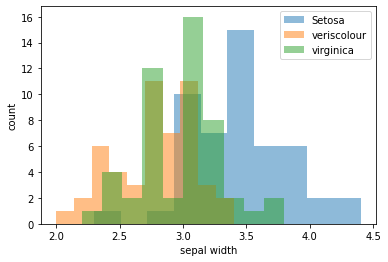

In [ ]:
plt.hist(x_dat.T[1][y_dat==0], bins = 10, alpha = .5)
plt.hist(x_dat.T[1][y_dat==1], bins = 10, alpha = .5)
plt.hist(x_dat.T[1][y_dat==2], bins = 10, alpha = .5)
plt.xlabel('sepal width')
plt.ylabel('count')

plt.legend(['Setosa','veriscolour', 'virginica'])

#### Part b
Generate the same plot for the "petal length" variable. Are the flower species better separated according to this feature? Write your answer below



**Answer here:** Yes

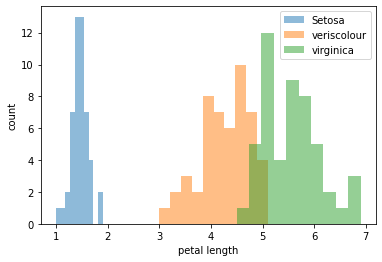

In [ ]:
plt.hist(x_dat.T[2][y_dat==0], bins = 10, alpha = .5)
plt.hist(x_dat.T[2][y_dat==1], bins = 10, alpha = .5)
plt.hist(x_dat.T[2][y_dat==2], bins = 10, alpha = .5)
plt.xlabel('petal length')
plt.ylabel('count')

plt.legend(['Setosa','veriscolour', 'virginica'])

#### Part c
Generate a scatter plot of the three iris species with the sepal width variable on the x axis, and the petal length variable on the y axis. Be sure to clearly demonstrate the species using a color code, or specific mark, and make this easy to read with a legend!

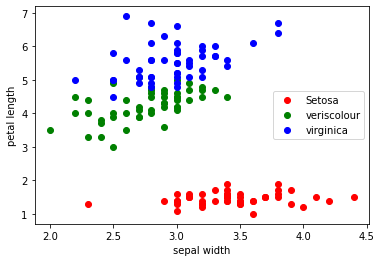

In [ ]:
plt.plot(x_dat.T[1][y_dat==0],x_dat.T[2][y_dat==0],'or')
plt.plot(x_dat.T[1][y_dat==1],x_dat.T[2][y_dat==1],'og')
plt.plot(x_dat.T[1][y_dat==2],x_dat.T[2][y_dat==2],'ob')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend(['Setosa','veriscolour', 'virginica'])

### Question 2: regression
#### part a:
Make the appropriate "design matrix" for multivariate linear regression for this question by inserting a column of ones to the begining of x data.

In [ ]:
import numpy as np

new_col = np.ones((np.shape(x_dat)[0],1))
x_design = np.hstack((new_col,x_dat))
#x_design


NameError: ignored

### Part b:
Split the data into training and testing pieces. You may use the included scikitlearn train and test function for this step. Please split using an 80% train/20% test split. 

Use the training data to solve for the estimated regression weights using the 
$$
\hat{\theta} = (X^\top X)^{-1}X^\top Y 
$$
formula. Be mindful of matrix dimensions!

In [ ]:
np.random.seed(seed)

kfolds = 5
mse_avg = 0
for _ in range(kfolds):
  X_train, X_test, y_train, y_test = train_test_split(x_design, y_dat,train_size=0.8)
  theta_hat = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
  y_hat = theta_hat@X_test.T
  mse_avg = mse_avg + np.sum(np.square(y_hat-y_test))/np.size(y_test)
  print(f' Weights for each of the kfolds: {theta_hat} ')
print( f'\n MSE: {mse_avg/kfolds}')

 Weights for each of the kfolds: [ 0.08301149 -0.13751655  0.01994606  0.25739996  0.57050787] 
 Weights for each of the kfolds: [ 0.27057216 -0.13684496 -0.0353853   0.23490821  0.62960348] 
 Weights for each of the kfolds: [ 0.31941964 -0.14827913 -0.0289327   0.23518044  0.63390625] 
 Weights for each of the kfolds: [ 0.18004911 -0.09534788 -0.06360913  0.23497356  0.56113193] 
 Weights for each of the kfolds: [ 0.41232014 -0.18323096 -0.01612906  0.26897004  0.58741353] 

 MSE: 0.050991886751855196


#### Part c
Calculate the mean squared error on the held-out data using the weights from above.

In [ ]:
np.random.seed(seed)
print(f' MSE: {mse_avg/kfolds}') # we divide it by the kfolds because in the loop we have the accumulated mse of all kfolds

 MSE: 0.050991886751855196


#### Part d

Now, organize the above code in a sensible, functional way so you can perform many-fold cross-validation. Calculate the average test mean squared error on held out data over 5 fold cross validation. Do this several times, one for when we use one feature (or observation) or X, another for 2, another for 3, and another for 4 features. What do you notice about the cross-validated mean squared error as we include more and more x observations. Write your answer below

**Answer here:** Gets smaller

In [ ]:
n_feats = [1,2,3,4]
mses_feats = []
errs_feats = []
for i in n_feats:
  x_des_f = x_design[:,0:i]
  nfolds = 5
  mse_avg = 0
  avg_errs = 0
  for _ in range(nfolds):
    X_train, X_test, y_train, y_test = train_test_split(x_des_f, y_dat,train_size=0.8)
    theta_hat = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    y_hat = theta_hat@X_test.T
    mse_avg = mse_avg + np.sum(np.square(y_hat-y_test))/np.size(y_test)
    avg_errs = avg_errs + np.sum(~(np.round(y_hat) == y_test))
  print(mse_avg)
  mses_feats = np.append(mses_feats, mse_avg/nfolds)
  errs_feats= np.append(errs_feats, avg_errs/nfolds)

3.448958333333333
1.4768272406176244
1.1051540401304776
0.3537646494481904


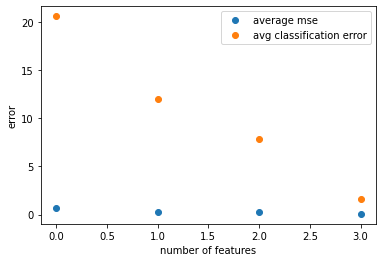

In [ ]:
plt.plot(mses_feats,'o')
plt.plot(errs_feats,'o')
plt.xlabel('number of features')
plt.ylabel('error')
plt.legend(['average mse','avg classification error'])

####part e
Finally, because this dataset should really be using a *classification* model, instead of a regression model, let's slightly modify our above example. Instead of calculating mean squared error on the held-out data, use `np.round` to make an *estimated species* from the predicted y_hat. Based on this nearest integer of y_hat, identify the **number of errors* made on the 20% held-out data.

Create the same plot as above, still averaged over 5-fold cross validation, that shows the average number of errors made in species prediction on held-out data as you increase the number of features in X.

In [ ]:
np.round(y_hat) == y_test



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

[20.6 12.   7.8  1.6]


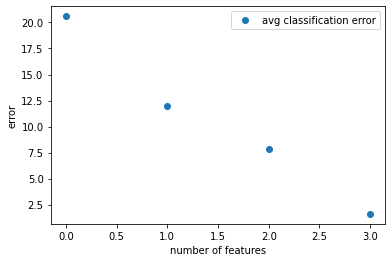

In [ ]:
print(errs_feats)
plt.plot(errs_feats,'o')
plt.xlabel('number of features')
plt.ylabel('error')
plt.legend(['avg classification error'])

**Challenge**: Generate a similar plot as you did in part 2e, where each datapoint is a location in the 2 dimensional scatter plot. This time, however, indicate the classification performance on the plot (say, a + indicating correct classification, and '-' indicating incorrect classification. Do you notice regions of the feature space where errors are more likely to occur? Write a sentence interpreting your answer.

**Answer here:** Errors are more likely to occur in regions where there is a significant overlap between different classes. For example, between the overlap of Iris Virginica and Iris Versicolor